# Data Scientist Technical Test

The following test was created for the interview process for the Data Scientist Role at the Jooycar Data Team consisting in a real case scenario.

## Business Case:

Jooycar is an Insurtech Company focused on improving the driving behavior of our customers by using the power of telematics.
We divide our lines of businesses in two groups: Individual Customers and Fleets. 

In order to test the ability of the applying candidate, we have provided a fake Mongo Database (working the same way as a real one does) that needs to be called by using the Pymongo API providing information of recently joined fleets. This means that we don't know much about them. So your task will be to explore the given information and provide as much insights as possible using your Data Science Skills. In order to do that we provide the following Metadata:

* Tenants Collection: Includes info about the fleets, including id, name and country of origin.
* Devices Collection: Includes info about the devices we plug into the vehicle. It will include information about the status of the devices plus the different relationships with the rest of the collections.
* Vehicles Collection: Includes info about the vehicle including brand, model, plate number, and relationships to other collections.

Additionally, we have included a pre-report with aggregated telematic data in a csv format. This info corresponds to information that can be obtained by using our device and it was generated using data of the first week of every fleet working with us.

We are expecting the candidate can at least present the following:

* Code used to carry out the analysis (uploaded to your Github Account).
* The candidate should sort out the dependencies to create the fake database provided.
* It is expected the code leverages popular Data Science Tools such as pandas, matplotlib, seaborn, etc.
* You are expected to report all the insights found such as, but not limited to, the following:
    * Number of New Fleets.
    * Vehicles per Fleet.
    * Analysis of the Devices.
    * Analysis regarding the Driving Behavior.
    * Analysis associated to the Company Activity.
    * and so on.
* You are expected to also report discrepancies, and inconsistencies on the data provided.
    
The final deliverable showing your findings is up to you and it can be a Slide Presentation, an interactive Dashboard, or a Jupyter Notebook.

In [1]:
# This chunk will create 3 fake collections: tenants, devices, vehicles.
# The structure of this collections are fully compatible with Pymongo API.
# https://pymongo.readthedocs.io/en/stable/tutorial.html Here is the Documentation in case you are not familiar with MongoDB.
from helpers import create_mongodb
tenants, devices, vehicles = create_mongodb() # these are every one of the collections to be called.

In order to access to any collection you can do the following:

In [2]:
list(vehicles.find({}))[:5]

[{'_id': ObjectId('5d657e698a5f6942db9f3c11'),
  'display': {'brand': 'Volkswagen', 'model': 'Beetle'},
  'plate': 'ALU 527',
  'user_id': ObjectId('5d657c938a5f6942db9f3c09'),
  'device_id': ObjectId('5880e24d00ad707e0eae9e77')},
 {'_id': ObjectId('5d9f26b5eaa32726e8431512'),
  'display': {'brand': 'SEAT', 'model': 'IBIZA'},
  'plate': 'VQN 500',
  'user_id': ObjectId('5d9f249eeaa32726e8431506'),
  'device_id': ObjectId('5b6b0f8eaeb12127dda51593')},
 {'_id': ObjectId('5d9f26e6eaa32726e8431513'),
  'display': {'brand': 'Volkswagen', 'model': 'Polo'},
  'plate': 'F13 2KV',
  'user_id': ObjectId('5d9f2514eaa32726e8431509'),
  'device_id': ObjectId('5b6b0f90aeb12127dda515b9')},
 {'_id': ObjectId('5d9f2710eaa32726e8431517'),
  'display': {'brand': 'Hyundai', 'model': 'Accent'},
  'plate': '782GVC',
  'user_id': ObjectId('5d9f25a1eaa32726e843150b'),
  'device_id': ObjectId('5b6b0f8eaeb12127dda5158a')},
 {'_id': ObjectId('5d9f273feaa32726e843151a'),
  'display': {'brand': 'Chevrolet', 'model

> This is one way to access the data, although Pymongo recommends using Python Comprehensions  (and so do we) to make sure you are fetching the correct fields.

> Additionally, notice that every collection has its own **"_id"** field. This is a proper MongoDB characteristic and **"_id"** will be the unique identifier of the collection. You can use **"_id"** to combine info with other collections by using it accordingly.

The `telematics.csv` file includes info regarding behavior at the client level. You can access the data by using pandas:

In [3]:
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_info_columns', 90)
pd.read_csv('telematics.csv').head()

,user_id,distance (km),hard_accels_q,hard_breaks_q,max_speed_km_h,avg_speed,n_trips,user_name
0,5d657c938a5f6942db9f3c09,463.97,710.0,40.0,136.0,39.55,57.0,Hunter Tucker
1,5d9f249eeaa32726e8431506,565.48,882.0,85.0,150.0,41.20,88.0,Sharon Hammond MD
2,5d9f2514eaa32726e8431509,0.00,0.0,0.0,0.0,0.00,0.0,Kimberly Edwards
3,5d9f25a1eaa32726e843150b,346.12,384.0,22.0,94.0,36.35,80.0,Ryan Lyons
4,5da767dee5db1457a98497be,843.80,1620.0,86.0,128.0,40.64,97.0,Denise Deleon


In [4]:
list(tenants.find({}))

[{'_id': ObjectId('5f09b342fc04f0058f569c5f'),
  'country': 'US',
  'company': 'Chang-Fisher'},
 {'_id': ObjectId('5f0cc718c1b2b360ec398d56'),
  'country': 'CAN',
  'company': 'Sheppard-Tucker'},
 {'_id': ObjectId('5f0ced25acac95702f00a708'),
  'country': 'CAN',
  'company': 'Faulkner-Howard'},
 {'_id': ObjectId('5f0d16573eff27739fba9606'),
  'country': 'US',
  'company': 'Wagner LLC'},
 {'_id': ObjectId('5f0d168db55cd673b02216a5'),
  'country': 'US',
  'company': 'Campos PLC'},
 {'_id': ObjectId('5f0d16ec6cb9a37440f29a44'),
  'country': 'CAN',
  'company': 'Archer-Patel'},
 {'_id': ObjectId('5f0d1722a58a4f744ad80a96'),
  'country': 'US',
  'company': 'Patrick, Barrera and Collins'},
 {'_id': ObjectId('5f0d1762fc1fde746982bde1'),
  'country': 'CAN',
  'company': 'Jones, Jefferson and Rivera'},
 {'_id': ObjectId('5f0d17faf90b31750fbc32bf'),
  'country': 'CAN',
  'company': 'Garcia, Hamilton and Carr'},
 {'_id': ObjectId('5f0d1989f2ebfe7663ffe4eb'),
  'country': 'US',
  'company': 'Levy 

### Data Analysis

In this section, we'll take a look on the data that we are going to work with. Also, we'll transform these datasets to DataFrames.

In [5]:
df_tenants = pd.DataFrame(list(tenants.find({})))
df_devices = pd.DataFrame(list(devices.find({})))
df_vehicles = pd.DataFrame(list(vehicles.find({})))

In [6]:
# We study the data type for each column of each dataset.
print('Tenants shape: ', df_tenants.shape)
print('Tenants dtypes: \n', df_tenants.dtypes)
print('')
print('Devices shape: ', df_devices.shape)
print('Devices dtypes: \n', df_devices.dtypes)
print('')
print('Vehicles shape: ', df_vehicles.shape)
print('Vehicles dtypes: \n', df_vehicles.dtypes)

Tenants shape:  (45, 3)
Tenants dtypes: 
 _id        object
country    object
company    object
dtype: object

Devices shape:  (411, 5)
Devices dtypes: 
 _id           object
status        object
imei          object
vehicle_id    object
tenant_id     object
dtype: object

Vehicles shape:  (426, 5)
Vehicles dtypes: 
 _id          object
display      object
plate        object
user_id      object
device_id    object
dtype: object


In [7]:
# Given that the previous part didn't give much information, we'll use df.head for each DataFrame for further inspection.
print('Tenants first 5 rows: \n', df_tenants.head())
print('')
print('Devices first 5 rows: \n', df_devices.head())
print('')
print('Vehicles first 5 rows: \n', df_vehicles.head())

Tenants first 5 rows: 
                         _id country          company
0  5f09b342fc04f0058f569c5f      US     Chang-Fisher
1  5f0cc718c1b2b360ec398d56     CAN  Sheppard-Tucker
2  5f0ced25acac95702f00a708     CAN  Faulkner-Howard
3  5f0d16573eff27739fba9606      US       Wagner LLC
4  5f0d168db55cd673b02216a5      US       Campos PLC

Devices first 5 rows: 
                         _id    status           imei                vehicle_id                                          tenant_id
0  5e7a40e523711d7a967d8182    active  7248867465861  5f09b343fc04f0058f569c61  [5f09b342fc04f0058f569c5f, 603964d57aeee85fb61...
1  5e7a40e423711d7a967d80f6    active  7559633721153  5f0cd1df2ffa7a66eebf2468  [5f0cc718c1b2b360ec398d56, 603964d57aeee85fb61...
2  5e7a40e423711d7a967d80e0    active  8829750537238  5f0cd1de2ffa7a66eebf2467  [5f0cc718c1b2b360ec398d56, 603964d57aeee85fb61...
3  5e7a40e423711d7a967d8102  inactive  5110204273777  5f0cd1dc2ffa7a66eebf2466  [5f0cc718c1b2b360ec398d56, 603964

In [8]:
# And we do the same for the telematics.csv file
df_telematics = pd.read_csv('telematics.csv')
print('Telematics shape: ', df_telematics.shape)
print('Telematics dtypes: \n', df_telematics.dtypes)
print('')
print('Telematics first 5 rows: \n', df_telematics.head())

Telematics shape:  (260, 8)
Telematics dtypes: 
 user_id            object
distance (km)     float64
hard_accels_q     float64
hard_breaks_q     float64
max_speed_km_h    float64
avg_speed         float64
n_trips           float64
user_name          object
dtype: object

Telematics first 5 rows: 
                     user_id  distance (km)  hard_accels_q  hard_breaks_q  max_speed_km_h  avg_speed  n_trips          user_name
0  5d657c938a5f6942db9f3c09         463.97          710.0           40.0           136.0      39.55     57.0      Hunter Tucker
1  5d9f249eeaa32726e8431506         565.48          882.0           85.0           150.0      41.20     88.0  Sharon Hammond MD
2  5d9f2514eaa32726e8431509           0.00            0.0            0.0             0.0       0.00      0.0   Kimberly Edwards
3  5d9f25a1eaa32726e843150b         346.12          384.0           22.0            94.0      36.35     80.0         Ryan Lyons
4  5da767dee5db1457a98497be         843.80         1620.0    

In [9]:
# The next thing we are going to do, is for both Devices and Vehicles DataFrames, we'll expand the columns that have 
# dictionary, in the case of Vehicles, and lists, for Devices, in order to get a better grasp of the data.
df_vehicles['display_brand'] = [x['brand'] for x in df_vehicles['display']]
df_vehicles['display_model'] = [x['model'] for x in df_vehicles['display']]
df_vehicles.drop(columns=['display'], inplace = True)

# For the devices, the procedure is slightly different, because we'd like to repeat the data for each unique element
# of each list. In this case, we'll use pandas explode function.
df_devices = df_devices.explode('tenant_id')
df_devices.reset_index(drop=True,inplace=True)

In [10]:
# We can see that all DataFrames have no duplicates
print('Number of repeated rows for telematics: ', df_telematics[df_telematics.duplicated() == True].shape[0])
print('Number of repeated rows for tenants: ', df_tenants[df_tenants.duplicated() == True].shape[0])
print('Number of repeated rows for vehicles: ', df_vehicles[df_vehicles.duplicated() == True].shape[0])
print('Number of repeated rows for devices: ', df_devices[df_devices.duplicated() == True].shape[0])

Number of repeated rows for telematics:  0
Number of repeated rows for tenants:  0
Number of repeated rows for vehicles:  0
Number of repeated rows for devices:  0


In [11]:
# The last thing we are going to do before analyzing each DataFrame, is to check if any of this DataFrames has either
# null or empty ('') values for each of its rows.

# We'll start with the null values
import numpy as np
print('Rows with null values in telematics: ', df_telematics[df_telematics.isna().any(axis=1)].shape[0])
print('Rows with null values in tenants: ', df_tenants[df_tenants.isna().any(axis=1)].shape[0])
print('Rows with null values in vehicles: ', df_vehicles[df_vehicles.isna().any(axis=1)].shape[0])
print('Rows with null values in devices: ', df_devices[df_devices.isna().any(axis=1)].shape[0])
print('')

# Now the empty values ('')
print('Rows with empty values in telematics: ', len(np.where(df_telematics.applymap(lambda x: x == ''))[0]))
print('Rows with empty values in tenants: ', len(np.where(df_tenants.applymap(lambda x: x == ''))[0]))
print('Rows with empty values in vehicles: ', len(np.where(df_vehicles.applymap(lambda x: x == ''))[0]))
print('Rows with empty values in devices: ', len(np.where(df_devices.applymap(lambda x: x == ''))[0]))


Rows with null values in telematics:  0
Rows with null values in tenants:  0
Rows with null values in vehicles:  35
Rows with null values in devices:  0

Rows with empty values in telematics:  0
Rows with empty values in tenants:  0
Rows with empty values in vehicles:  20
Rows with empty values in devices:  0


In [12]:
# We are going to study a bit more de Vehicles DataFrame, to see if it's necessary to either drop some rows, or if we leave them unchanged
print(df_vehicles[df_vehicles.isna().any(axis=1)].head())

# In this case, we see that both user_id and device_id columns have None values. 
# However, because the user_id in order to join the data with telematics, we'll remove these rows.
df_vehicles = df_vehicles.dropna().reset_index(drop=True)

# Now we check the empty values
print(df_vehicles.loc[(df_vehicles.applymap(lambda x: x == '')==True).any(axis=1)])

# This time, because the vehicle brand and model aren't priority (Compared to ids), we'll keep these rows, because
# they still give relevant information. This cells were renamed "NO BRAND" and "NO MODEL"
df_vehicles['display_brand'] = df_vehicles['display_brand'].replace({'':'NO BRAND'})
df_vehicles['display_model'] = df_vehicles['display_model'].replace({'':'NO MODEL'})

                         _id     plate user_id device_id display_brand display_model
42  5f0d1a7cd449707729607d3f  2G 8643W    None      None        NISSAN         VERSA
68  5f0d1b3ffddc6d77d4e696c6   7SG 952    None      None    VOLKSWAGEN         VENTO
69  5f0d1b41fddc6d77d4e696c8   NP-7703    None      None        NISSAN         VERSA
70  5f0d1b42fddc6d77d4e696ca   VZR-082    None      None           KIA           RIO
71  5f0d1b44fddc6d77d4e696cc   J40 3CW    None      None          SEAT         IBIZA
                          _id     plate                   user_id                 device_id display_brand display_model
9    5f0cd1d92ffa7a66eebf2464   MSX 869  5f0cc719c1b2b360ec398d57  5e7a40e323711d7a967d8096    Volkswagen              
22   5f0d1724a58a4f744ad80a9a   6PQ J61  5f0d1724a58a4f744ad80a99  5e7a40e223711d7a967d801d                            
56   5f0d1a95d449707729607d63  JYC-3647  5f0d1a95d449707729607d62  5e7a40e323711d7a967d8088                            
97   5f57c

We'll see now the Telematics DataFrame, a quick description of it's numerical values. We'll do a more complete analyzis after reviewing all the other DataFrames.

In [13]:
df_telematics.describe()

,distance (km),hard_accels_q,hard_breaks_q,max_speed_km_h,avg_speed,n_trips
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,361.119538,476.376923,30.538462,76.507692,25.139231,90.669231
std,459.685745,515.472842,55.965606,57.663281,20.089581,109.576573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,266.190000,400.000000,9.500000,104.000000,29.340000,53.500000
75%,518.252500,760.500000,38.250000,122.000000,39.705000,115.000000
max,2709.930000,2887.000000,373.000000,176.000000,70.010000,489.000000


We notice that there are some users whose distance is zero. In these cases, it should be checked if the user didn't use the vehicle at all, or if there's a problem with the device.

# Tenants

We'll start the analysis of each individual DataFrame before crossing the data, to see what can we find for each DataFrame.

First, we'll see if there are values that repeat for each column, in particular for company and country columns.

In [14]:
# Company
if len(df_tenants['company']) == len(df_tenants['company'].unique()):
    print('There are no duplicated values for company column')
else:
    print(df_tenants['company'].value_counts())

There are no duplicated values for company column


In [15]:
# Country
if len(df_tenants['country']) == len(df_tenants['country'].unique()):
    print('There are no duplicated values for country column')
else: 
    print(df_tenants['country'].value_counts())

CAN    23
US     22
Name: country, dtype: int64


In [16]:
# _id
if len(df_tenants['_id']) == len(df_tenants['_id'].unique()):
    print('There are no duplicated values for the id column')
else: 
    print(df_tenants['_id'].value_counts())

There are no duplicated values for the id column


With this information, we can plot the distribution of the Fleets per Country as follows.

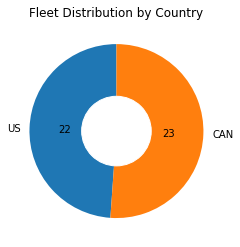

In [17]:
import matplotlib.pyplot as plt

def valor_absoluto(val):
    a  = size[np.abs(size - val/100.*sum(size)).argmin()]
    return a

countries = list(df_tenants['country'].unique())
size = [df_tenants['country'].value_counts()[x] for x in countries]
 
centro_donut = plt.Circle( (0,0), 0.4, color='white')
plt.pie(size, 
        labels=countries, 
        wedgeprops = {'linewidth': 0, 'edgecolor' : 'white'}, 
        autopct=valor_absoluto, 
        startangle = 90)
p = plt.gcf()
p.gca().add_artist(centro_donut)
plt.title('Fleet Distribution by Country')
plt.show()

# Devices

Doing a process similar to the Vehicles one, we first see the Dataset on its own. For this, we'll check the status of the devices first.

In [18]:
df_devices['status'].value_counts()

active        331
inactive      109
pre-active     56
Name: status, dtype: int64

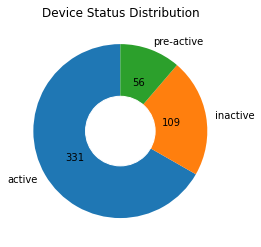

In [19]:
device_status = list(df_devices['status'].unique())
size = [df_devices['status'].value_counts()[x] for x in device_status]
 
centro_donut = plt.Circle( (0,0), 0.4, color='white')
plt.pie(size, 
        labels=device_status, 
        wedgeprops = {'linewidth': 0, 'edgecolor' : 'white'}, 
        autopct=valor_absoluto, 
        startangle = 90)
p = plt.gcf()
p.gca().add_artist(centro_donut)

plt.title('Device Status Distribution')

plt.show()

In [20]:
# We also study the IMEI values.
count_list = [x for x in df_devices['imei'].value_counts()]
values, counts = np.unique(count_list, return_counts=True)
values, counts

(array([1, 2, 3]), array([334,  69,   8], dtype=int64))

We notice that 8 IMEI values are repeated 3 times, and that 69 IMEI values are repeated twice. Usually, this number is unique per device, meaning that there may be an inconsistency with the data.

# Vehicles

In [21]:
df_vehicles.head()

,_id,plate,user_id,device_id,display_brand,display_model
0,5d657e698a5f6942db9f3c11,ALU 527,5d657c938a5f6942db9f3c09,5880e24d00ad707e0eae9e77,Volkswagen,Beetle
1,5d9f26b5eaa32726e8431512,VQN 500,5d9f249eeaa32726e8431506,5b6b0f8eaeb12127dda51593,SEAT,IBIZA
2,5d9f26e6eaa32726e8431513,F13 2KV,5d9f2514eaa32726e8431509,5b6b0f90aeb12127dda515b9,Volkswagen,Polo
3,5d9f2710eaa32726e8431517,782GVC,5d9f25a1eaa32726e843150b,5b6b0f8eaeb12127dda5158a,Hyundai,Accent
4,5d9f273feaa32726e843151a,WVC-452,5d9f25f3eaa32726e843150d,5b6b0f8faeb12127dda515a9,Chevrolet,Spark


The most intresting columns to analyze in this case are display_brand and display_model.

In [22]:
df_vehicles['display_brand'].value_counts().head()

NISSAN    115
Nissan     56
ISUZU      44
TOYOTA     43
KIA        18
Name: display_brand, dtype: int64

In [23]:
df_vehicles['display_model'].value_counts().head()

NP 300          81
ELF 300         39
VERSA DRIVE     25
VENTO           20
NISSAN TSURU    18
Name: display_model, dtype: int64

We notice that, in both cases, there are brands/model that were written in different ways, but they are the same brand/model. We'll transform both columns with .upper(), in order to get both brands and model in caps.

In [24]:
df_vehicles['display_brand'] = [x.upper() for x in df_vehicles['display_brand']]
df_vehicles['display_model'] = [x.upper() for x in df_vehicles['display_model']]

In [25]:
df_vehicles['display_brand'].value_counts()

NISSAN           171
TOYOTA            51
ISUZU             44
KIA               27
VOLKSWAGEN        26
SEAT              17
HYUNDAI           17
CHEVROLET         15
FORD               6
VW                 4
INTERNATIONAL      4
RENAULT            4
NO BRAND           3
N/A                1
GMC                1
Name: display_brand, dtype: int64

Eventhough in this case, there is a N/A, it will be added to a new brand named "OTHERS", where all the brands with less than 10 Vehicles will be added for the plots we'll do next.

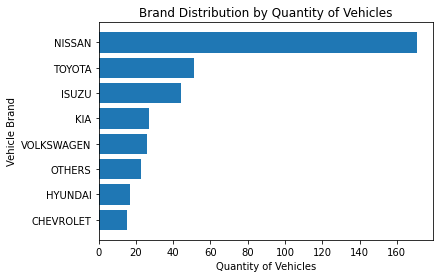

In [26]:
from collections import OrderedDict
brand = list(df_vehicles['display_brand'].unique())
size = [df_vehicles['display_brand'].value_counts()[x] for x in brand]

# Juntamos los valores chicos
small_values = 0
positions_to_remove = []
for x in range(len(size)):
    if size[x] < 10:
        small_values = small_values + size[x]
        positions_to_remove.append(x)
    else:
        pass

brand = [x for x in brand if brand.index(x) not in positions_to_remove]
size = [x for x in size if size.index(x) not in positions_to_remove]
brand.append('OTHERS')
size.append(small_values)

new_dict = {}
for x in range(len(brand)):
    new_dict[size[x]] = brand[x]

new_dict = OrderedDict(sorted(new_dict.items(), reverse=False))
size = list(new_dict.keys())
brand = list(new_dict.values())
 
y_pos = np.arange(len(brand))
plt.barh(y_pos, size)
plt.yticks(y_pos, brand)

plt.title('Brand Distribution by Quantity of Vehicles')
plt.xlabel("Quantity of Vehicles")
plt.ylabel("Vehicle Brand")
 
plt.show()

In the case of the vehicle models, we realize that there are cases in which the name differ only by a blank space. To solve this, we use a dictionary for each model, we keep it's name, name without spaces, and quantity of appearances. After that, in case that there are two values with the same name, we keep the one with the highest number of appearances.

In [27]:
model_dict = {}
for model in df_vehicles['display_model']:
    no_space_model = model.replace(' ','')
    if no_space_model in model_dict:
        try:
            if model_dict[no_space_model][model]:
                model_dict[no_space_model][model] += 1
        except:
            model_dict[no_space_model][model] = model
            model_dict[no_space_model][model] = 1
    else:
        model_dict[no_space_model] = {}
        model_dict[no_space_model][model] = model
        model_dict[no_space_model][model] = 1
        
{k: model_dict[k] for k in list(model_dict)[:12]}

{'BEETLE': {'BEETLE': 1},
 'IBIZA': {'IBIZA': 10},
 'POLO': {'POLO': 1},
 'ACCENT': {'ACCENT': 1},
 'SPARK': {'SPARK': 1},
 'JETTA': {'JETTA': 1},
 'TUCSON': {'TUCSON': 1},
 'LEON': {'LEON': 1},
 'NOMODEL': {'NO MODEL': 13},
 'RIO': {'RIO': 25},
 'PRIUS': {'PRIUS ': 18, 'PRIUS': 13},
 'STEPWAY': {'STEPWAY': 2}}

Now, we can transform the model column to values without blank spaces. We'll replace the models with more than one possible name with the name without blank spaces, while the other models will keep their original name.

In [28]:
new_dict = {}

for model in model_dict:
    if len(model_dict[model]) > 1:
        new_dict[model] = sum(list(model_dict[model].values()))
    else:
        new_dict[model] = list(model_dict[model].values())[0]

In a similar way, if the appearances of a brand is less than 12, we'll add them in a new category called "OTHERS".

In [29]:
small_values = 0
models_to_delete = []
for model in new_dict:
    if new_dict[model] < 12:
        small_values = small_values + new_dict[model]
        models_to_delete.append(model)
    else:
        pass
    
for model in models_to_delete:
    del new_dict[model]

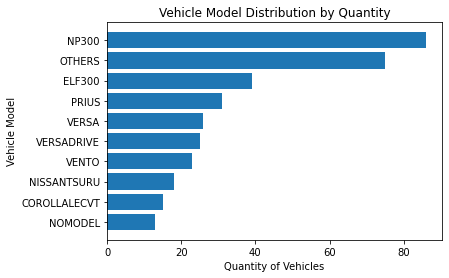

In [30]:
new_dict['OTHERS'] = small_values
new_dict = {y:x for x,y in new_dict.items()}
new_dict = OrderedDict(sorted(new_dict.items(), reverse=False))
size = list(new_dict.keys())
model = list(new_dict.values())
 
y_pos = np.arange(len(model))
plt.barh(y_pos, size)
plt.yticks(y_pos, model)

plt.title('Vehicle Model Distribution by Quantity')
plt.xlabel("Quantity of Vehicles")
plt.ylabel("Vehicle Model")
 
plt.show()

# Telematics

We'll start by viewing the data of users whose driven distance is zero. As we mentioned before, it mean that the user didn't drive in this period, but it may also mean that the device isn't registering the data. We expect that for user whose driven distance is zero, that all other key registers such as avg_speed are also zero.

In [31]:
print(df_telematics[df_telematics['distance (km)'] == 0])

                      user_id  distance (km)  hard_accels_q  hard_breaks_q  max_speed_km_h  avg_speed  n_trips          user_name
2    5d9f2514eaa32726e8431509            0.0            0.0            0.0             0.0        0.0      0.0   Kimberly Edwards
5    5f09b37bd0cf38059d590912            0.0            0.0            0.0             0.0        0.0      0.0      Jeremy Joseph
10   5f0d15fb85f956737dc80f4d            0.0            0.0            0.0             0.0        0.0      0.0      Jordan Oliver
13   5f0d165a3eff27739fba9609            0.0            0.0            0.0             2.0        2.0      4.0    Samuel Williams
14   5f0d168db55cd673b02216a6            0.0            0.0            0.0             0.0        0.0      0.0  Jennifer Gonzalez
..                        ...            ...            ...            ...             ...        ...      ...                ...
246  612d5b656d960b79743ae200            0.0            0.0            0.0             0.0

In [32]:
print('hard_accels_q: ', (df_telematics[df_telematics['distance (km)'] == 0]['hard_accels_q'] != 0).sum())
print('hard_breaks_q: ', (df_telematics[df_telematics['distance (km)'] == 0]['hard_breaks_q'] != 0).sum())
print('max_speed_km_h: ', (df_telematics[df_telematics['distance (km)'] == 0]['max_speed_km_h'] != 0).sum())
print('avg_speed: ', (df_telematics[df_telematics['distance (km)'] == 0]['avg_speed'] != 0).sum())
print('n_trips: ', (df_telematics[df_telematics['distance (km)'] == 0]['n_trips'] != 0).sum())

hard_accels_q:  0
hard_breaks_q:  0
max_speed_km_h:  1
avg_speed:  1
n_trips:  1


We notice that there's a particular user that registers data in max_speed, avg_speed, and number of trips, eventhough his travelled distance is zero. This data isn't consistent, so we recommend that this device is fixed if possible.
It's also recommended that all the zero cases are studied, because it's strange that almost a third of the total users didn't travel at all.

For the data, we are going to make an histogram for each of the distributions. We are going to remove the data were the travelled distance is zero to avoid any distortion in the plots.

In [33]:
df_telematics_non_zero = df_telematics[df_telematics['distance (km)'] > 0]

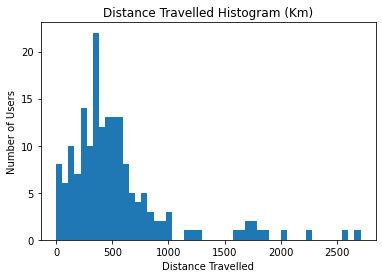

In [34]:
# Distance (km)
plt.hist(df_telematics_non_zero['distance (km)'], bins=50)
plt.gca().set(title='Distance Travelled Histogram (Km)', xlabel='Distance Travelled', ylabel='Number of Users');

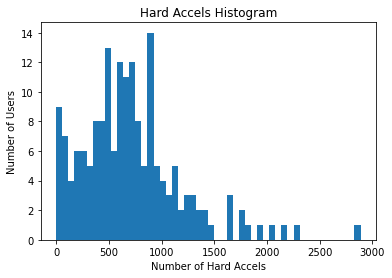

In [35]:
# hard_accels_q
plt.hist(df_telematics_non_zero['hard_accels_q'], bins=50)
plt.gca().set(title='Hard Accels Histogram', xlabel='Number of Hard Accels', ylabel='Number of Users');

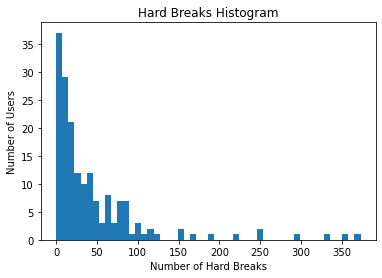

In [36]:
# hard_breaks_q
plt.hist(df_telematics_non_zero['hard_breaks_q'], bins=50)
plt.gca().set(title='Hard Breaks Histogram', xlabel='Number of Hard Breaks', ylabel='Number of Users');

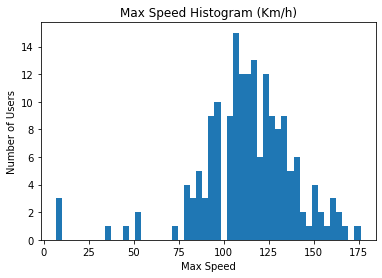

In [37]:
# max_speed_km_h
plt.hist(df_telematics_non_zero['max_speed_km_h'], bins=50)
plt.gca().set(title='Max Speed Histogram (Km/h)', xlabel='Max Speed', ylabel='Number of Users');

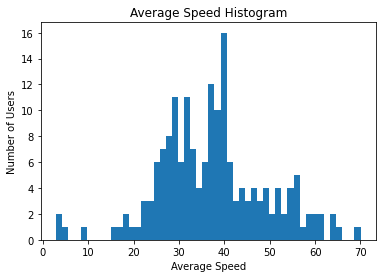

In [38]:
# avg_speed
plt.hist(df_telematics_non_zero['avg_speed'], bins=50)
plt.gca().set(title='Average Speed Histogram', xlabel='Average Speed', ylabel='Number of Users');

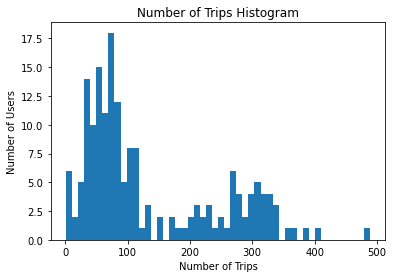

In [39]:
# n_trips
plt.hist(df_telematics_non_zero['n_trips'], bins=50)
plt.gca().set(title='Number of Trips Histogram', xlabel='Number of Trips', ylabel='Number of Users');

# All Data

In [40]:
# First, we merge the telematics and vehicles DataFrames by user_id
df_vehicles['user_id'] = [str(x) for x in df_vehicles['user_id']]
df = pd.merge(df_telematics, df_vehicles, on=['user_id'])
# Devices
df_devices_renamed = df_devices.rename(columns={'_id': 'device_id'})
df = pd.merge(df, df_devices_renamed, on=['device_id'])
# Tenants
df_tenants_renamed = df_tenants.rename(columns={'_id': 'tenant_id'})
df = pd.merge(df, df_tenants_renamed, on=['tenant_id'])

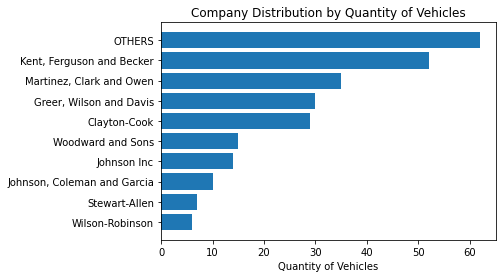

In [41]:
# For the companies, we add all the companies with less than 10 appearances.
company = list(df['company'].unique())
values = [df['company'].value_counts()[x] for x in company]

# We add the small values
small_values = 0
positions_to_remove = []
for x in range(len(values)):
    if values[x] < 6:
        small_values = small_values + values[x]
        positions_to_remove.append(x)
    else:
        pass

company = [x for x in company if company.index(x) not in positions_to_remove]
values = [x for x in values if values.index(x) not in positions_to_remove]
company.append('OTHERS')
values.append(small_values)

new_dict = {}
for x in range(len(company)):
    new_dict[values[x]] = company[x]

new_dict = OrderedDict(sorted(new_dict.items(), reverse=False))
values = list(new_dict.keys())
company = list(new_dict.values())
 
y_pos = np.arange(len(company))
plt.barh(y_pos, values)
plt.yticks(y_pos, company)
plt.title('Company Distribution by Quantity of Vehicles')
plt.xlabel("Quantity of Vehicles")
# plt.ylabel("Name of the Company")
 
plt.show()

Finally, we are going to view a heatmap of the average values for each numerical column in telematics by vehicle brand.

In [42]:
# We'll add avg_speed to the df alone, because adding the values doesn't make much sense.
avg_df = df[['display_brand','distance (km)','hard_accels_q','hard_breaks_q','max_speed_km_h','n_trips']].groupby('display_brand').sum().sort_values('distance (km)', ascending=False).reset_index()

avg_df = avg_df.set_index('display_brand')

avg_df['avg_speed'] = 0
avg_df['quantity'] = 0

# We add the avg_speed and quantity values per brand
for brand in avg_df.index:
    avg_df['avg_speed'][brand] = df[df['display_brand'] == brand]['avg_speed'].mean()
    avg_df['quantity'][brand] = df['display_brand'].value_counts()[brand]
    
# We now divide each of the following columns to obtain the average value per user.
# We'll omit the avg_speed, because the values are alredy averaged
avg_df['distance (km)'] = [x/y for x, y in zip(avg_df['distance (km)'], avg_df['quantity'])]
avg_df['hard_accels_q'] = [x/y for x, y in zip(avg_df['hard_accels_q'], avg_df['quantity'])]
avg_df['hard_breaks_q'] = [x/y for x, y in zip(avg_df['hard_breaks_q'], avg_df['quantity'])]
avg_df['max_speed_km_h'] = [x/y for x, y in zip(avg_df['max_speed_km_h'], avg_df['quantity'])]
avg_df['n_trips'] = [x/y for x, y in zip(avg_df['n_trips'], avg_df['quantity'])]

# We round the decimal values
avg_df = avg_df.round(2)

# We rename the columns so they look better in the presentation
avg_df = avg_df.reset_index()
avg_df.rename(columns={'display_brand': 'Vehicle Brand', 
                       'distance (km)': 'Distance (Km)',
                       'hard_accels_q': 'Quantity of Hard Accel.',
                       'hard_breaks_q': 'Quantity of Hard Breaks',
                       'max_speed_km_h': 'Max Speed (Km/h)',
                       'n_trips': 'Number of Trips',
                       'avg_speed': 'Average Speed',
                       'quantity': 'Number of Vehicles'}, inplace=True)
avg_df = avg_df.set_index('Vehicle Brand')

<ipython-input-42-2646d3f3b136>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_df['avg_speed'][brand] = df[df['display_brand'] == brand]['avg_speed'].mean()
<ipython-input-42-2646d3f3b136>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_df['quantity'][brand] = df['display_brand'].value_counts()[brand]


In [43]:
avg_df.style.background_gradient(cmap='Blues')

,Distance (Km),Quantity of Hard Accel.,Quantity of Hard Breaks,Max Speed (Km/h),Number of Trips,Average Speed,Number of Vehicles
Vehicle Brand,,,,,,,
NISSAN,327.040000,483.430000,32.780000,78.740000,101.950000,24,117
TOYOTA,345.110000,316.540000,34.730000,61.110000,33.110000,21,37
ISUZU,409.700000,671.170000,26.130000,95.600000,208.330000,31,30
KIA,518.300000,331.280000,16.220000,78.780000,34.670000,30,18
VOLKSWAGEN,401.580000,286.240000,36.120000,64.060000,38.290000,21,17
SEAT,404.840000,531.270000,37.360000,79.640000,40.640000,25,11
CHEVROLET,394.010000,501.500000,28.000000,82.800000,49.400000,28,10
HYUNDAI,435.550000,854.000000,12.750000,85.500000,139.380000,27,8
NO BRAND,626.440000,690.000000,43.500000,110.000000,73.000000,40,2
